   CustomerID  Age  Income  LoanAmount  CreditScore
0           1   34   63961       13576          531
1           2   50   34158       19395          323
2           3   67   92702       37663          416
3           4   26   84846       44572          747
4           5   58   40787       25598          805
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   20 non-null     int64
 1   Age          20 non-null     int64
 2   Income       20 non-null     int64
 3   LoanAmount   20 non-null     int64
 4   CreditScore  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes
Index(['CustomerID', 'Age', 'Income', 'LoanAmount', 'CreditScore'], dtype='object')
Using 'CreditScore' as the target column instead of 'Credit_Score'
Accuracy Score: 0.0
Classification Report:
               precision    recall  f1-score   support

         323 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

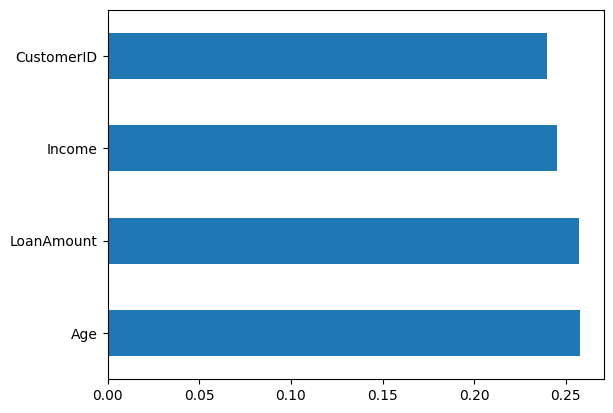

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/credit_data.csv")

# Display basic info
print(df.head())  # ✅ Use print() instead of display()
df.info()  # ✅ Just call df.info()

# Handling missing values
df.dropna(inplace=True)

# Encoding categorical columns (if any)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Check if 'Credit_Score' or a similar column exists in the DataFrame
print(df.columns) # Print the columns to verify

# If 'Credit_Score' is not found, you might need to adjust the column name.
# Let's assume the target column is named 'credit_score' (lowercase)
target_column = 'Credit_Score'
# If the column is not found, try looking for similar names and update target_column
if target_column not in df.columns:
    potential_targets = [col for col in df.columns if 'credit' in col.lower() and 'score' in col.lower()]
    if potential_targets:
        target_column = potential_targets[0]
        print(f"Using '{target_column}' as the target column instead of 'Credit_Score'")
    else:
        raise KeyError(f"'Credit_Score' or similar column not found in the dataset. Please check the data.")


# Splitting features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance visualization (Fixed)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')  # ✅ Fixed the issue
plt.show()  # ✅ Show the plot